<a href="https://colab.research.google.com/github/Tanu-N-Prabhu/UsedCarPricePredictionSystem-Files/blob/master/Data_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Preparation**

## **Accessing the Data**

### **Importing and installing the necessary libraries**

#### This section comprises only importing the necessary libraries required for this data science project.


In [0]:
# Importing the necessary libraries

import pandas as pd                                  # Loading the dataset into a dataframe and performing the desired operations
import numpy as np                                   # Performing the mathematical operations on the dataframes when required
import time                                          # Used to measure the time taken to load the data as a dataframe
import sys                                           # Used to get the size of the object
import warnings                                      # Hides all warnings in ipython
warnings.filterwarnings('ignore')                    # Ignoring all the warnings
from sklearn.feature_selection import SelectKBest    # Used to select the best features for the model
from sklearn.feature_selection import chi2           # Used to perform Chi Square test on the datatest (gives the important features)
import matplotlib.pyplot as plt                      # Used for visualization
!pip install googletrans              # Install googletrans using pip. This is for translating the data
import googletrans                    # Google translation methods
from googletrans import Translator

  Created wheel for googletrans: filename=googletrans-2.4.0-cp36-none-any.whl size=15777 sha256=b0fa9d5ac98c28a2c03d601484a7f2146d55e5af2802bbf1f4b309e15c01986b
  Stored in directory: /root/.cache/pip/wheels/50/d6/e7/a8efd5f2427d5eb258070048718fa56ee5ac57fd6f53505f95
Successfully built googletrans




---



### **Storing the dataset into a pandas dataframe**

#### In this section, we will read the data from the CSV (Comma Seperated Value) file and then store it into a dataframe.


**To avoid the `utf-8` error we need to use a different way to read the CSV file**

**Error description**: `'utf-8' codec can't decode byte 0xdc in position 14: invalid continuation byte`. It is mainly because the actual data set CSV file doesn't actually contain **utf-8 encoded data**, it contains some other encoding. We will manually encode it to **cp1252**



> **Hint**: `The header in the below code is not compulsory`


In [0]:
# Storing the dataset (CSV file) as a pandas dataframe
start_time = time.time()                                                                                  # Calculating the time taken to convert the dataset from CSV to dataframe
df = pd.read_csv("/content/drive/My Drive/Dataset/autos.csv", sep = ',', header = 0, encoding='cp1252')   # Storing the CSV file into a dataframe
print("--- %s seconds ---" % (time.time() - start_time))                                                  # Displaying the time in seconds

--- 4.003186464309692 seconds ---


I am using the [python time library](https://docs.python.org/3/library/time.html) to calculate the total time taken to load the entire dataset and display it in seconds.



---



### **Displaying the dataframe**

#### In this section, we will have a look at the stored dataframe.

We will use the pandas `head()` and the `tail()` methods which displays the top and the bottom rows of the dataframe respectively.

In [0]:
df.head(5)                   # Display top 5 rows of the dataframe

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [0]:
df.tail(5)                    # Display last 5 rows of the dataframe

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21
371527,2016-03-07 19:39:19,BMW_M135i_vollausgestattet_NP_52.720____Euro,privat,Angebot,28990,control,limousine,2013,manuell,320,m_reihe,50000,8,benzin,bmw,nein,2016-03-07 00:00:00,0,73326,2016-03-22 03:17:10




---



### **Number of instances and features**

#### In this section, we will determine the number of instances and the features of the dataframe.

As we all know a dataset is a collection of labelled examples i.e. 
\begin{equation*}
 {\{(x_i, y_i)\}_{i=1}^N} 
\end{equation*}

Each element `xi` among `N` is called a feature vector. The feature vector is a value that describes the example in a dataset. This value is called as a feature which is represented as shown below: \begin{equation*}
{x^j}
\end{equation*}

A feature vector is a vector in which each dimension `j = 1, . . . , D` contains a value that describes the example somehow.




In [0]:
df.shape                    # The shape method the total number of rows and columns of the dataframe

(371528, 20)

There are 371, 528 instances and 20 columns

**In other words**

* Rows = 371, 528
* Columns = 20

**Total number of elements in the object (dataframe)**


In [0]:
totalElements = df.size
print(f"{totalElements:,d}")

7,430,560


**Size of the object in bytes**



In [0]:
sys.getsizeof(df) 

344749766

**Getting the features and their count**

In [0]:
featureCount = len(df.columns)
featureCount

20

In [0]:
features = list(df.columns.values)
features

['dateCrawled',
 'name',
 'seller',
 'offerType',
 'price',
 'abtest',
 'vehicleType',
 'yearOfRegistration',
 'gearbox',
 'powerPS',
 'model',
 'kilometer',
 'monthOfRegistration',
 'fuelType',
 'brand',
 'notRepairedDamage',
 'dateCreated',
 'nrOfPictures',
 'postalCode',
 'lastSeen']


**Below is the details of the features**

* **dateCrawled** : when this ad was first crawled, all field-values are taken from this date
* **name** : "name" of the car
* **seller** : private or dealer
* **offerType**: With offer or without offer
* **price** : the price on the ad to sell the car
* **abtest**: Test on the car
* **vehicleType**: Type of the car (Sedan, truck, etc.)
* **yearOfRegistration** : at which year the car was first registered
* **gearbox**: Automatic or manual transmission
* **powerPS** : power of the car in PS
* **model**: Model of the car
* **kilometer** : how many kilometers the car has driven
* **monthOfRegistration** : at which month the car was first registered
* **fuelType**: Gas, Petrol, Diesel, etc.
* **brand**: Mercedes, Audi, BMW, etc.
* **notRepairedDamage** : if the car has a damage which is not repaired yet
* **dateCreated** : the date for which the ad at ebay was created
* **nrOfPictures** : number of pictures in the ad (unfortunately this field * contains everywhere a 0 and is thus useless (bug in crawler!) )
* **postalCode**: Area wise postal code
* **lastSeenOnline** : when the crawler saw this ad last online



---



### **Getting some more insights from the dataframe**

#### In this section, we will try to get more information from the dataframe. Lets explore more about the dataframe.



In [0]:
df.info()                                     # Getting information about the datatypes alternative to df.dtypes()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

As seen from the above results, we the dataframe comprises two different data types such as `int` and `object`. Totally there are **7** integer datatypes and **13** object datatypes. Here the `object` data type can actually contain multiple different types. In this case, the feature `name` comrpises both string and integer such as **Golf_3_1.6**. 



In [0]:
df.describe()                            # Getting the descriptive statistics of the dataframe.

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000




---



## **Data Exploration** 

### **Removing Outliers** 
When we see the above results there are few things that catches our attentions and these things need to be fixed immediately such as:

1. How can the minumum value of a price be **0**?
2. How can the year of registration of a vehicle be **1000**?
3. How can the minimum power of a vehicle be **0**?
4. How can the month of registration of a vehicle be **0**?

So there is no point in keeping these equivalent rows lets remove them. Lets set a threshold value for all these above features and remove them accordingly. For example,

1. Lets keep the vehicle whose year of registration is between 1950 and 2019 and remove the rest. 
2. Lets keep the power of the vehicle between 100, 1500. This is because the one of lowest power car is [Mitsubishi Mirage](https://www.cars.com/research/mitsubishi-mirage-2019/trims/), its power is 78 ps and the car with the highest power is [Lotus Evija](https://driving.ca/lotus/auto-news/news/the-lotus-evija-is-a-2000-hp-electric-hypercar). Setting the threshold according to these cars will help us in our exploration. Because there is no way there is a car with power lower than 78 or higher than 20000 in the market.
3. Lets keep the price of the vehicle between 100 to 200,000. Because one of the most expensive cars in europe is [Maybach 62](http://www.cartodrive.eu/carfinder/Maybach/62/S-6.0-V12-Automatic/Specifications/) which is 423,000 euros. And there are no such cars in the data frame.

4. Lets remove the vehicles who's month of registration is 0.



In [0]:
# Cleaning the expectional values from the dataframe. The threshold values can be set using the df[].between methods.

df_clean = df[
                (df["yearOfRegistration"].between(1950, 2019, inclusive=True)) &  
                (df["powerPS"].between(100, 1500, inclusive=True)) &
                (df["price"].between(100, 200000, inclusive=True))
             ]

Now let first remove the vehicles who's month of registration is 0. Because this does'nt seem right.

In [0]:
# Storing all the indexes who's month of registration is 0

monthOfRegistration = df_clean[df_clean['monthOfRegistration'] == 0 ].index

In [0]:
# Removing all the desired index values using drop()

df_clean.drop(monthOfRegistration , inplace=True)



---



### **Removing irrelevant columns as of now**

#### In this section, we will remove irrelevant columns that do not contribute for prediction.


For some reason the code `df.sum(axis = 0)` is not working, it is taking more time and yet not executing, making the notebook to crash.

In [0]:
# Taking the sum to see if any columns has 0 values in it
print(df_clean['kilometer'].sum())
print(df_clean['price'].sum())
print(df_clean['yearOfRegistration'].sum())
print(df_clean['powerPS'].sum())
print(df_clean['monthOfRegistration'].sum())
print(df_clean['nrOfPictures'].sum())
print(df_clean['postalCode'].sum())

25393270000
1669773090
401813515
31318400
1286709
0
10555500224


As seen above the sum of `nrOfPictures` resulting to 0 meaning that there are no pictures. So I will just remove the column.

In [0]:
df_clean = df_clean.drop(columns= ['nrOfPictures'])

**Using `groupby()` to see for any column to drop**

In [0]:
df_clean.groupby('seller').count()

,dateCrawled,name,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
seller,,,,,,,,,,,,,,,,,,
gewerblich,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
privat,200458,200458,200458,200458,200458,191784,200458,198592,200458,193902,200458,200458,192039,200458,178967,200458,200458,200458


There is only one instance of the seller "gewerblich". So let's remove this. Since all the values in this coloumns seller are private, so there are no other mixed value, removing is the only option.

In [0]:
seller = df_clean[((df_clean.seller == 'gewerblich'))].index
seller

Int64Index([186181], dtype='int64')

In [0]:
df_clean = df_clean.drop(seller)

In [0]:
df_clean = df_clean.drop(columns=['seller'])

Now let's see what to do with the offerType. Since there is only one category of offerType callde `Angebot` which is `offer`. There is no point of keeping this column.

In [0]:
df_clean.groupby('offerType').count()

,dateCrawled,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
offerType,,,,,,,,,,,,,,,,,
Angebot,200458,200458,200458,200458,191784,200458,198592,200458,193902,200458,200458,192039,200458,178967,200458,200458,200458


In [0]:
del df_clean['offerType']

In [0]:
df_clean.groupby('vehicleType').count()

,dateCrawled,name,price,abtest,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
vehicleType,,,,,,,,,,,,,,,,
andere,1195,1195,1195,1195,1195,1184,1195,1089,1195,1195,1127,1195,888,1195,1195,1195
bus,21205,21205,21205,21205,21205,21002,21205,20727,21205,21205,20823,21205,19533,21205,21205,21205
cabrio,16444,16444,16444,16444,16444,16279,16444,15889,16444,16444,16132,16444,15234,16444,16444,16444
coupe,14676,14676,14676,14676,14676,14540,14676,13982,14676,14676,14329,14676,13318,14676,14676,14676
kleinwagen,8054,8054,8054,8054,8054,7983,8054,7801,8054,8054,7804,8054,7100,8054,8054,8054
kombi,51745,51745,51745,51745,51745,51372,51745,50657,51745,51745,50298,51745,46386,51745,51745,51745
limousine,66236,66236,66236,66236,66236,65766,66236,64633,66236,66236,64685,66236,59709,66236,66236,66236
suv,12229,12229,12229,12229,12229,12164,12229,11660,12229,12229,12023,12229,11323,12229,12229,12229


This is totally fine because this columns has a mixture of values.

The reason for dropping all the below columns is that any meaning insights could not be drawn from the data. Such as the date crawled and created do not contribute nothing because these are used indicated the scraping details of the data. Similarly, the abtest columns is not known. I also contact to the original author, no information was provided on this. Lastly, the lastseen indicated the status of the vehicle on the e-bay website, so this will not help in the price prediction. Similarly let's remove the name of the car, because we have `model`, `brand` which are the supporting features.

In [0]:
# dropping columns

df_clean = df_clean.drop(columns= ['dateCrawled', 'name', 'abtest', 'dateCreated', 'lastSeen'])

As there are more null values in the `notRepairedDamage` columns, anyways rather than fill it with `nein` lets remove it.

In [0]:
df_clean['notRepairedDamage'].isnull().sum()

21491

In [0]:
del df_clean['notRepairedDamage']

The mostly cleaned dataframe can be seen below:

In [0]:
df_clean.head(5)

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,postalCode
1,18300,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,66954
2,9800,suv,2004,automatik,163,grand,125000,8,diesel,jeep,90480
5,650,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,33775
6,2200,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,67112
8,14500,bus,2014,manuell,125,c_max,30000,8,benzin,ford,94505




---



### **Dealing with the missing values**
#### In this section, we will use a technique to find and deal with missing values.

**Missing value count in the dataframe**

In [0]:
df_clean.isnull().sum()

price                     0
vehicleType            8674
yearOfRegistration        0
gearbox                1866
powerPS                   0
model                  6556
kilometer                 0
monthOfRegistration       0
fuelType               8419
brand                     0
postalCode                0
dtype: int64

As seen from the above results, there are many missing values in `vehicleType`, `gearbox`, `model`, `fuelType`, `notRepairedDamage`. Now rather than deleting all the null values let's follow a alternative approach. Because deleting would a lame and useless method. Also, now of the [Data Impuatation](https://www.dropbox.com/s/nije38rerpfa18o/Chapter5.pdf?dl=0) techniques mentioned in the text book **100 page machine learning book** such as replacing the mean values, using a learning algorithm, or even interpolating cannot be applied. This is because of the datatyes of the dataframe. All these are not integer values, they are strings. So below is the approach that I would be following to handle the missing values:


In [0]:
df_clean['gearbox'].value_counts()

manuell      138237
automatik     60355
Name: gearbox, dtype: int64

So lets use the column `brand` to fill the gearbox values. Because as seen above the `manuell` is more when compared to `automatik` so fill the maximum frequency value would not make any sense.

In [0]:
df_clean.groupby("brand")["gearbox"].value_counts()

brand       gearbox  
alfa_romeo  manuell       1665
            automatik      125
audi        manuell      16823
            automatik     9619
bmw         manuell      21648
                         ...  
toyota      automatik      307
volkswagen  manuell      28231
            automatik     8019
volvo       manuell       1821
            automatik      880
Name: gearbox, Length: 76, dtype: int64

In [0]:
# Using brand values to fill the gearbox values

gearbox = df_clean["gearbox"].unique()
brand = df_clean["brand"].unique()
d = {}

for i in brand :
    m = 0
    for j in gearbox :
        if df_clean[(df_clean.gearbox == j) & (df_clean.brand == i)].shape[0] > m :
            m = df_clean[(df_clean.gearbox == j) & (df_clean.brand == i)].shape[0]
            d[i] = j

In [0]:
for i in brand :
    df_clean.loc[(df_clean.brand == i) & (df_clean.gearbox.isnull()) ,"gearbox" ] = d[i]

In [0]:
df_clean['gearbox'].isnull().sum()

0

Now the null values in the gearbox columns is zero.

**Let's use the same technique to deal with `fuelType` column**

In [0]:
df_clean["fuelType"].value_counts()        

benzin     106498
diesel      81277
lpg          3831
cng           262
hybrid        113
andere         35
elektro        23
Name: fuelType, dtype: int64

As seen above from the above result, the most common value is `benzin` and `diesel`. Petrol (benzin) would be replaced for the null values.


In [0]:
df_clean["fuelType"].fillna("benzin",inplace = True)

In [0]:
df_clean['fuelType'].isnull().sum()

0

Now we have dealt with all the null values.

**Let's now deal with the `vehicleType` column**

In [0]:
df_clean["vehicleType"].value_counts()

limousine     66236
kombi         51745
bus           21205
cabrio        16444
coupe         14676
suv           12229
kleinwagen     8054
andere         1195
Name: vehicleType, dtype: int64

Here we cannot replace any value here because almost all have equal shares here. So `maxfreq` technique cannot be applied here. Rather we will use the `fuelType` to fill all the null values for the `vehicleTupe`. This is because as we all know both these columns are interdependent.

In [0]:
df_clean.groupby("fuelType")["vehicleType"].value_counts()

fuelType  vehicleType
andere    limousine          9
          kombi              8
          bus                4
          suv                4
          andere             3
          cabrio             2
          kleinwagen         2
          coupe              1
benzin    limousine      42195
          kombi          21284
          cabrio         14724
          coupe          11946
          bus             7087
          kleinwagen      6435
          suv             3924
          andere           625
cng       bus              118
          kombi             93
          limousine         25
          andere             7
          kleinwagen         3
          cabrio             1
          coupe              1
          suv                1
diesel    kombi          29424
          limousine      22632
          bus            13572
          suv             7759
          coupe           2438
          kleinwagen      1553
          cabrio          1532
          andere 

Let's now map the `fuelType` to `vehicleType`, this is know as one-to-one mapping.

In [0]:
vehicleType = df_clean["vehicleType"].unique()
fuelType = df_clean["fuelType"].unique()
print(fuelType)
print(vehicleType)
vehicleType = np.delete(vehicleType,0)

['diesel' 'benzin' 'lpg' 'andere' 'hybrid' 'cng' 'elektro']
['coupe' 'suv' 'limousine' 'cabrio' 'bus' 'kombi' nan 'andere'
 'kleinwagen']


In [0]:
d = {}
for i in fuelType :
    m = 0
    for j in vehicleType :
        if df_clean[(df_clean.vehicleType == j) & (df_clean.fuelType == i)].shape[0] > m :
            m = df_clean[(df_clean.vehicleType == j) & (df_clean.fuelType == i)].shape[0]
            d[i] = j

In [0]:
for i in fuelType :
    df_clean.loc[(df_clean.fuelType == i) & (df_clean.vehicleType.isnull()) ,"vehicleType" ] = d[i]

In [0]:
df_clean["vehicleType"].isnull().sum()

0

Now we have dealt with all the null values. 

**Let's us deal with the null values of `model` column**

In [0]:
df_clean['model'].value_counts()

3er                17152
andere             14756
golf               14084
a4                  8692
passat              7917
                   ...  
discovery_sport        1
agila                  1
picanto                1
kalos                  1
up                     1
Name: model, Length: 235, dtype: int64

Let's fill all the value with `3er` because of maximum shares.

In [0]:
df_clean["model"].fillna("3er",inplace =True)

### **Dealing with the duplicate values**
#### In this section, we will use a technique to find and deal with duplicate values.

In [0]:
duplicateRows = df_clean[df_clean.duplicated(['postalCode', 'brand', 'model', 'powerPS', 'kilometer', 'price'])]
df_clean = df_clean.drop_duplicates(['postalCode', 'brand', 'model', 'powerPS', 'kilometer', 'price'])
duplicateRows

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,postalCode
1097,11890,bus,2011,manuell,116,c_max,150000,4,diesel,ford,97737
2937,1999,limousine,2001,manuell,116,3er,150000,8,benzin,bmw,44359
3964,2999,limousine,2002,manuell,101,golf,150000,6,diesel,volkswagen,32756
4332,18750,limousine,2014,manuell,150,golf,20000,9,diesel,volkswagen,38518
4424,14500,kombi,2007,manuell,140,a6,100000,3,diesel,audi,94060
...,...,...,...,...,...,...,...,...,...,...,...
371490,13850,kombi,2012,manuell,156,accord,125000,10,benzin,honda,91301
371498,699,limousine,1999,manuell,101,vectra,150000,3,benzin,opel,65936
371510,6500,limousine,2003,automatik,145,e_klasse,150000,3,diesel,mercedes_benz,60437
371513,4400,limousine,2008,manuell,105,leon,150000,7,diesel,seat,45896


In [0]:
df_clean.groupby('brand').size()

brand
alfa_romeo         1660
audi              24153
bmw               30566
chevrolet           857
chrysler           1035
citroen            1677
dacia               223
daewoo              103
daihatsu             48
fiat               1621
ford              10126
honda              1211
hyundai            1603
jaguar              504
jeep                610
kia                1303
lada                  2
lancia              142
land_rover          582
mazda              3037
mercedes_benz     24332
mini               2018
mitsubishi         1321
nissan             1839
opel              14361
peugeot            4255
porsche            1809
renault            4619
rover               224
saab                417
seat               2510
skoda              2696
smart                73
sonstige_autos     1575
subaru              409
suzuki              410
toyota             1942
volkswagen        32867
volvo              2450
dtype: int64

In [0]:
df_clean['model'].unique()

array(['3er', 'grand', '2_reihe', 'c_max', '3_reihe', 'passat', 'navara',
       'a_klasse', 'scirocco', '5er', 'andere', 'c4', 'e_klasse', '1er',
       'b_klasse', 'golf', 'a8', 'jetta', 'astra', 'c_klasse', 'sprinter',
       'forester', 'xc_reihe', 'scenic', 'focus', 'a4', 'tt', 'a6',
       'transporter', 'omega', 'slk', '7er', '80', 'civic', '147', 'glk',
       'z_reihe', 'sportage', 'sorento', 'mustang', 'eos', 'vito',
       'fabia', 'touran', 'insignia', 'almera', 'megane', 'a3', 'mondeo',
       'a1', 'vectra', 'clio', 'm_klasse', 'tiguan', '6_reihe', 'i_reihe',
       '5_reihe', 'yeti', 'octavia', 'zafira', 'rx_reihe', '6er',
       'beetle', 'touareg', 'ibiza', 'spider', 's_max', 'x_reihe', 'a5',
       'galaxy', 'c3', 'viano', 's_klasse', 'sharan', 'avensis', 'sl',
       'q5', 'santa', 'leon', 'cooper', '4_reihe', 'ptcruiser', 'clk',
       'primera', 'espace', 'exeo', 'polo', '159', 'transit', 'juke',
       'v40', 'escort', 'accord', 'corolla', 'phaeton', 'boxster',
  



---



### **Translating the dataframe from german to english**

#### In this section, we need to translate the dataframe only then we will understand what's in the dataframe. 

Rather than manually translating the values using google translate one by one it might take years due to the size of the dataframe. Rather with the help of my traslator function the entire dataframe can be passed into the function. As a end result the dataframe would be translated into English. Thanks to [googletrans Python API](https://pypi.org/project/googletrans/), all this can steps could be done in ease.

In [0]:
missing_values = ["n/a", "na", "--", ""]
df = pd.read_csv("/content/drive/My Drive/Dataset/autos.csv", sep = ',', header = 0, encoding='cp1252', na_values = missing_values)

In [0]:
df = df.dropna()
df = df.drop(['name', 'dateCrawled','price', 'yearOfRegistration','powerPS', 'kilometer', 'monthOfRegistration', 'dateCreated', 'nrOfPictures','postalCode', 'lastSeen'], axis=1)

In [0]:
translator = Translator()
translations = {}
for column in df.columns:
    # unique elements of the column
    unique_elements = df[column].unique()
    for element in unique_elements:
        # add translation to the dictionary
        translations[element] = translator.translate(element).text
print(translations)

{'privat': 'private', 'gewerblich': 'commercial', 'Angebot': 'offer', 'Gesuch': 'petition', 'test': 'test', 'control': 'control', 'kleinwagen': 'small car', 'limousine': 'limousine', 'cabrio': 'cabrio', 'kombi': 'combi', 'suv': 'suv', 'bus': 'bus', 'coupe': 'coupe', 'andere': 'Others', 'manuell': 'manually', 'automatik': 'automatic', 'golf': 'golf', 'fabia': 'fabia', '3er': 'Presentation', '2_reihe': '2_reihe', '3_reihe': '3_reihe', 'passat': 'passat', 'navara': 'navara', 'twingo': 'twingo', 'c_max': 'c_max', 'a_klasse': 'a_klasse', 'scirocco': 'scirocco', '5er': 'Good', 'arosa': 'arosa', 'civic': 'civic', 'transporter': 'transporter', 'punto': 'point', 'e_klasse': 'e_klasse', 'one': 'one', 'clio': 'clio', '1er': '1er', 'b_klasse': 'b_klasse', 'astra': 'astra', 'fortwo': 'fortwo', 'a8': 'a8', 'jetta': 'jetta', 'polo': 'polo', 'fiesta': 'fiesta', 'c_klasse': 'c_klasse', 'micra': 'micra', 'vito': 'vito', 'sprinter': 'sprinter', '156': '156', 'escort': 'escort', 'forester': 'forester', 's

In [0]:
translations['ja'] = 'yes'

In [0]:
df.replace(translations, inplace = True)
# check translation
df.head(10)

,seller,offerType,abtest,vehicleType,gearbox,model,fuelType,brand,notRepairedDamage
3,private,offer,test,small car,manually,golf,gasoline,volkswagen,No
4,private,offer,test,small car,manually,fabia,diesel,skoda,No
5,private,offer,test,limousine,manually,Presentation,gasoline,bmw,yes
6,private,offer,test,cabrio,manually,2_reihe,gasoline,peugeot,No
7,private,offer,test,limousine,manually,Others,gasoline,volkswagen,No
10,private,offer,control,limousine,manually,3_reihe,gasoline,mazda,No
11,private,offer,control,combi,manually,passat,diesel,volkswagen,yes
14,private,offer,control,suv,manually,navara,diesel,nissan,No
17,private,offer,control,small car,automatic,twingo,gasoline,renault,No
18,private,offer,test,bus,manually,c_max,diesel,ford,No


In [0]:
df.brand.unique()

array(['volkswagen', 'skoda', 'bmw', 'peugeot', 'mazda', 'nissan',
       'renault', 'ford', 'Mercedes Benz', 'seat', 'honda', 'fiat',
       'mini', 'opel', 'smart', 'audi', 'Alfa Romeo', 'subaru',
       'mitsubishi', 'hyundai', 'volvo', 'lancia', 'porsche', 'citroen',
       'toyota', 'that', 'chevrolet', 'Dacia', 'suzuki', 'daihatsu',
       'chrysler', 'jaguar', 'rover', 'jeep', 'saab', 'daewoo',
       'land rover', 'trabant', 'frets'], dtype=object)

In [0]:
df.tail(10)

,seller,offerType,abtest,vehicleType,gearbox,model,fuelType,brand,notRepairedDamage
371512,private,offer,test,limousine,automatic,e_klasse,diesel,Mercedes Benz,yes
371513,private,offer,control,limousine,manually,leon,diesel,seat,No
371516,private,offer,control,small car,manually,wolf,gasoline,volkswagen,No
371517,private,offer,test,limousine,manually,golf,diesel,volkswagen,No
371518,private,offer,test,combi,manually,Presentation,diesel,bmw,No
371520,private,offer,control,limousine,manually,leon,gasoline,seat,yes
371521,private,offer,control,bus,manually,zafira,gasoline,opel,No
371524,private,offer,test,cabrio,automatic,fortwo,gasoline,smart,No
371525,private,offer,test,bus,manually,transporter,diesel,volkswagen,No
371527,private,offer,control,limousine,manually,m_reihe,gasoline,bmw,No


### **Dealing with the datatypes**
#### In this section, we will use a technique to encode and the convert all the object data into categorical.

In [0]:
for col in ['brand','vehicleType', 'gearbox', 'model', 'fuelType']:
    df_clean[col] = df_clean[col].astype('category')

In [0]:
# Assign codes to categorical attribues instead of strings

df_cloumns = df_clean.select_dtypes(['category']).columns

df_clean[df_cloumns] = df_clean[df_cloumns].apply(lambda x: x.cat.codes)
        

In [0]:
df_clean.head(5)

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,postalCode
1,18300,3,2011,1,190,11,125000,5,3,1,66954
2,9800,7,2004,0,163,114,125000,8,3,14,90480
5,650,6,1995,1,102,11,150000,10,1,2,33775
6,2200,2,2004,1,109,8,150000,8,1,25,67112
8,14500,1,2014,1,125,58,30000,8,1,10,94505


In [0]:
df_clean.groupby('fuelType').size()

fuelType
0        30
1    104156
2       235
3     73273
4        20
5       105
6      3371
dtype: int64

### **Feature Selection**

#### Feature selection techniques that are easy to use and also gives good results.

**Univariate Selection**

Statistical tests can be used to select those features that have the strongest relationship with the output variable.

The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

The example below uses the chi-squared (chi²) statistical test for non-negative features to select 10 of the best features 

In [0]:
#X = df_clean.drop('price', axis=1)
#y = df_clean['price']

In [0]:
#apply SelectKBest class to extract top 10 best features
#bestfeatures = SelectKBest(score_func=chi2, k=10)
#fit = bestfeatures.fit(X,y)

In [0]:
#dfscores = pd.DataFrame(fit.scores_)
#dfcolumns = pd.DataFrame(X.columns)

In [0]:
#concat two dataframes for better visualization 
#featureScores = pd.concat([dfcolumns,dfscores],axis=1)
#featureScores.columns = ['Features','Score']  #naming the dataframe columns

In [0]:
#featureScores.nlargest(10,'Score')  #print 10 best features

**Correlation Matrix with Heatmap**

Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

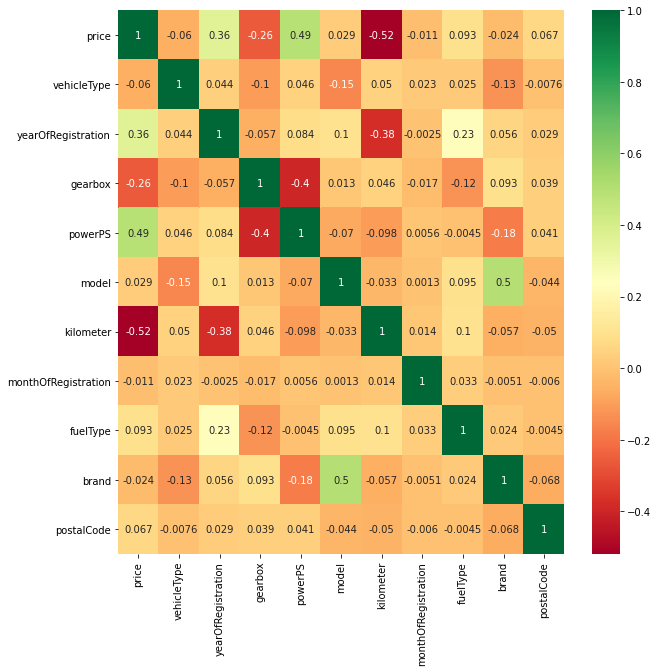

In [0]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df_clean.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(df_clean[top_corr_features].corr(),annot=True,cmap="RdYlGn")



---



### **One hot encoding**

This approach was suitable because proiorly I used `OneHotEncoding`, but the problem it encoded every possible values into different columns. Then at the end there were 301 columns. It was very hard to process and render this data into the model. As it was taking a lot of time. So I decided not to encode all the columns using onehot encoding. I will use one hot encoding only on `vehicleType` and `gearbox`.

**Using Onehotencoding on all the features**

```

df_clean=pd.get_dummies(data=df_clean,columns=['notRepairedDamage','vehicleType','model','brand','gearbox','fuelType'])
#cars_dummies = cars_updated.drop(columns=['notRepairedDamage','vehicleType','model','brand','gearbox','fuelType'])

```

![alt text](https://i.imgur.com/qXuivbr.png)






In [0]:
df_clean=pd.get_dummies(data=df_clean,columns=['vehicleType','gearbox'])

In [0]:
df_clean.head(5)

,price,yearOfRegistration,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,postalCode,vehicleType_0,vehicleType_1,vehicleType_2,vehicleType_3,vehicleType_4,vehicleType_5,vehicleType_6,vehicleType_7,gearbox_0,gearbox_1
1,18300,2011,190,11,125000,5,3,1,66954,0,0,0,1,0,0,0,0,0,1
2,9800,2004,163,114,125000,8,3,14,90480,0,0,0,0,0,0,0,1,1,0
5,650,1995,102,11,150000,10,1,2,33775,0,0,0,0,0,0,1,0,0,1
6,2200,2004,109,8,150000,8,1,25,67112,0,0,1,0,0,0,0,0,0,1
8,14500,2014,125,58,30000,8,1,10,94505,0,1,0,0,0,0,0,0,0,1




---



### **Removing the outliers using IQR technique**
A commonly used rule says that a data point is an outlier if it is more than 1.5*IQR above the third quartile or below the first quartile. Said differently, low outliers are below Q1 - 1.5 * IQR and high outliers are above Q3 + 1.5 *IQR

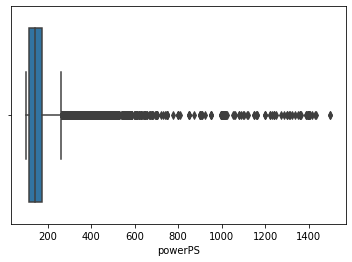

In [0]:
sns.boxplot(x=df_clean['powerPS'])

In [0]:
Q1 = df_clean.quantile(0.25)
Q3 = df_clean.quantile(0.75)
IQR = Q3 - Q1
IQR

price                   8599.0
yearOfRegistration         9.0
powerPS                   59.0
model                    121.0
kilometer              25000.0
monthOfRegistration        5.0
fuelType                   2.0
brand                     27.0
postalCode             41902.0
vehicleType_0              0.0
vehicleType_1              0.0
vehicleType_2              0.0
vehicleType_3              0.0
vehicleType_4              0.0
vehicleType_5              1.0
vehicleType_6              1.0
vehicleType_7              0.0
gearbox_0                  1.0
gearbox_1                  1.0
dtype: float64

In [0]:
df_clean = df_clean[~((df_clean < (Q1-1.5 * IQR)) |(df_clean > (Q3 + 1.5 * IQR))).any(axis=1)]
df_clean.shape

(94157, 19)



---



## **Visualization** 

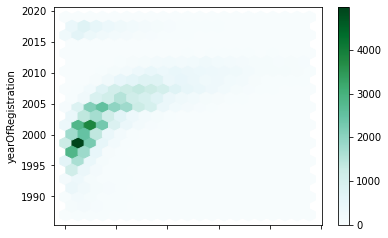

In [0]:
df_clean.plot.hexbin(x = 'price', y = 'yearOfRegistration', gridsize = 20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f49b06fa6d8>,
      dtype=object)

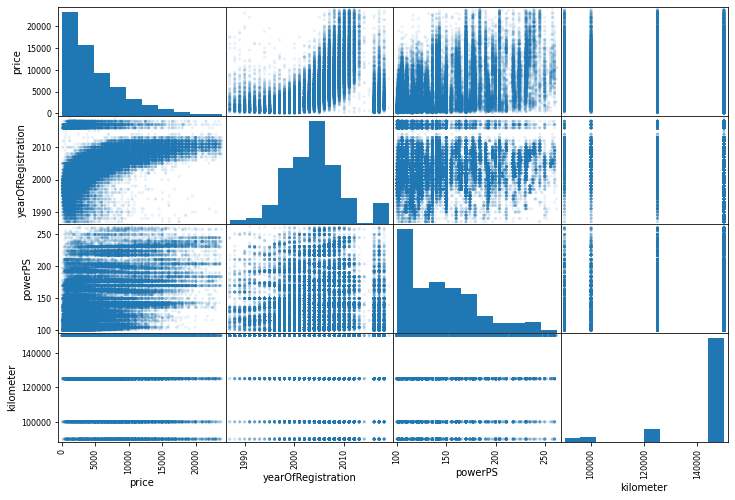

In [0]:
num_attributes = ["price", "yearOfRegistration", "powerPS", "kilometer"]
%matplotlib inline
pd.plotting.scatter_matrix(df_clean[num_attributes], figsize = (12,8), alpha = 0.1)